# Word Graph

### Installasi pymupdf

In [1]:
pip install --upgrade pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 48.0 MB/s eta 0:00:00


### Menghubungkan Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Membaca Paper dan Membuat file txt

In [3]:
import pymupdf

doc = pymupdf.open("/content/drive/MyDrive/76_A+Stratified+Modeling-Machine+Learning+Approach+to+Improve+the+Accuracy+of+Non-Invasive+Bloo.pdf") # open a document
out = open("output.txt", "wb") # create a text output
for page in doc: # iterate the document pages
    text = page.get_text().encode("utf8") # get plain text (is in UTF-8)
    out.write(text) # write text of page
    out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
out.close()

### Installasi nltk

In [4]:
%%capture
!pip install nltk

### Installasi Library nltk

In [5]:
import nltk
nltk.download('punkt')  # hanya perlu sekali
nltk.download('punkt_tab')  # opsional, untuk versi terbaru NLTK (≥3.8.2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### Membaca file txt

In [6]:
with open('output.txt', 'r', encoding='utf-8') as file:
    teks = file.read()

print(teks[:200])  # tampilkan 200 karakter pertama

	
76	
International Journal of Online and Biomedical Engineering (iJOE)	
iJOE | Vol. 21 No. 6 (2025)
iJOE  |  eISSN: 2626-8493  |  Vol. 21 No. 6 (2025)  | 
JOE
International Journal of 
Online and Bio


### Membaca kalimat

In [7]:
# Install: pip install nltk
import nltk


#text = "Ini adalah kalimat pertama. Ini kalimat kedua? Ya!"
sentences = nltk.sent_tokenize(teks)
print(sentences)
# Output: ['Ini adalah kalimat pertama.', 'Ini kalimat kedua?', 'Ya!']

['\t\n76\t\nInternational Journal of Online and Biomedical Engineering (iJOE)\t\niJOE | Vol.', '21 No.', '6 (2025)\niJOE\u2002 |\u2002 eISSN: 2626-8493\u2002 |\u2002 Vol.', '21 No.', '6 (2025)\u2002 |\u2002\nJOE\nInternational Journal of \nOnline and Biomedical Engineering\nFitrilina, Rusydi, M.I., Kurnia, R., Windasari, N., Putra, R.Z.', '(2025).', 'A Stratified Modeling-Machine Learning Approach to Improve the Accuracy \nof Non-Invasive Blood Glucose Estimation Using Photoplethysmography Signals.', 'International Journal of Online and Biomedical Engineering (iJOE), \n21(6), pp.', '76–96.', 'https://doi.org/10.3991/ijoe.v21i06.53815\nArticle submitted 2024-12-12.', 'Revision uploaded 2025-01-30.', 'Final acceptance 2025-01-30.', '© 2025 by the authors of this article.', 'Published under CC-BY.', 'Online-Journals.org\nPAPER\nA Stratified Modeling-Machine Learning Approach \nto Improve the Accuracy of Non-Invasive Blood Glucose \nEstimation Using Photoplethysmography Signals\nABSTRACT\n

### Mengubah sekumpulan data (list) menjadi bentuk tabel (DataFrame)

In [8]:
import pandas as pd
df = pd.DataFrame(sentences, columns=['kalimat'])
print(df)

                                               kalimat
0    \t\n76\t\nInternational Journal of Online and ...
1                                               21 No.
2         6 (2025)\niJOE  |  eISSN: 2626-8493  |  Vol.
3                                               21 No.
4    6 (2025)  | \nJOE\nInternational Journal of \n...
..                                                 ...
602  She continued specialist education in \nForens...
603  Currently, Dr. Winda is the Head of the Depart...
604  She is \nalso the Secretary of the Research Et...
605  Raffi Zahrandhika Putra graduated with a Bache...
606  He is currently working as a \nSpecialist Cons...

[607 rows x 1 columns]


### Import data di atas menjadi csv

In [9]:
df.to_csv('kalimat.csv', index=False, encoding='utf-8')

Untuk membuat word graph

Lanjutkan dengan menggunakan https://www.geeksforgeeks.org/nlp/co-occurence-matrix-in-nlp/

### Co-occurrence Matrix (Matriks Kemunculan Bersama)

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import numpy as np
import pandas as pd

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('kalimat.csv', encoding='utf-8')
text = " ".join(df['kalimat'].astype(str))

# Preprocess the text
stop_words = set(stopwords.words('english'))
words = word_tokenize(text.lower())
words = [word for word in words if word.isalnum() and word not in stop_words]

# Define the window size for co-occurrence
window_size = 2

# Create a list of co-occurring word pairs
co_occurrences = defaultdict(Counter)
for i, word in enumerate(words):
    for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
        if i != j:
            co_occurrences[word][words[j]] += 1

# Create a list of unique words
unique_words = list(set(words))

# Initialize the co-occurrence matrix
co_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

# Populate the co-occurrence matrix
word_index = {word: idx for idx, word in enumerate(unique_words)}
for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        co_matrix[word_index[word]][word_index[neighbor]] = count

# Create a DataFrame for better readability
co_matrix_df = pd.DataFrame(co_matrix, index=unique_words, columns=unique_words)

# Display the co-occurrence matrix
co_matrix_df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,see,mouhadjer,pearson,rf,decreases,many,atlas,7a,exhibited,5,...,saikouk,conference,detecting,34,abbosh,decrease,manai,sulaiman,estimating,stages
see,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mouhadjer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pearson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
decreases,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
decrease,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
manai,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
sulaiman,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
estimating,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Installasi networkx

In [11]:
%%capture
pip install networkx

### mengubah data matriks (tabel angka) menjadi struktur Graf Jaringan (Network Graph)

In [12]:
import networkx as nx
arr = co_matrix_df.to_numpy()
G=nx.from_numpy_array(arr)


### Visualisai Word Graph Node dengan Label angka

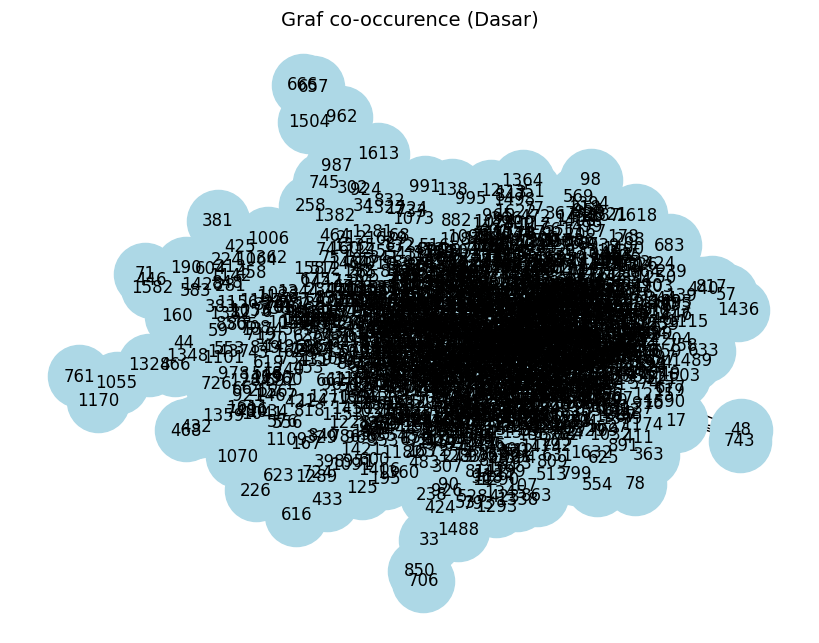

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=12)
plt.title("Graf co-occurence (Dasar)", fontsize=14)
plt.show()

### Visualisai Word Graph Node dengan Label Kata

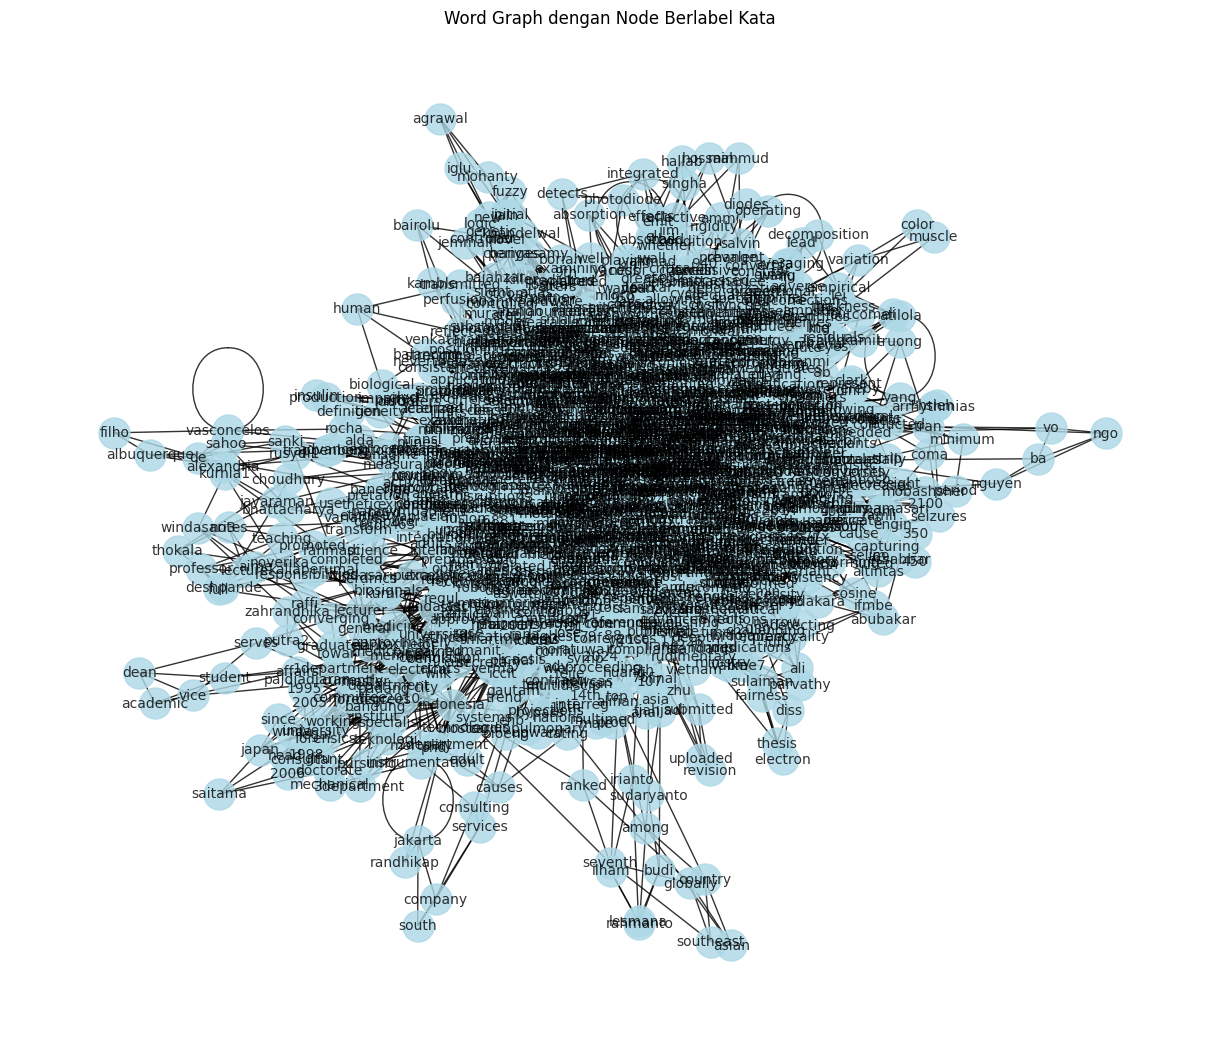

In [16]:
# 1. Buat kamus (dictionary) yang memetakan angka ke kata
# Pastikan 'unique_words' sudah terdefinisi dari cell sebelumnya
mapping_labels = {i: word for i, word in enumerate(unique_words)}

plt.figure(figsize=(12, 10))
nx.draw(
    G,
    labels=mapping_labels,  # <--- TAMBAHKAN INI
    with_labels=True,
    node_size=500,
    node_color='lightblue',
    font_size=10,
    alpha=0.8
)
plt.title("Word Graph dengan Node Berlabel Kata")
plt.show()

### mengubah label titik (node) pada graf yang tadinya berupa angka indeks (0, 1, 2...) kembali menjadi kata aslinya (teks)

In [17]:
mapping = {i: word for i, word in enumerate(unique_words)}
G = nx.relabel_nodes(G, mapping)


### menghitung tingkat kepentingan (PageRank) setiap kata dan menampilkan 10 kata kunci (keywords) paling dominan

In [18]:
pr = nx.pagerank(G, alpha=0.85)
pr_df = pd.DataFrame(list(pr.items()), columns=['Kata', 'PageRank']).sort_values(by='PageRank', ascending=False)
print(pr_df.head(10))


            Kata  PageRank
1402     glucose  0.017931
920        blood  0.013987
1491       https  0.010429
1358         100  0.009736
670          vol  0.008923
1470    diabetes  0.008172
899        using  0.008018
779   regression  0.007687
415           pp  0.007032
1166        data  0.006949


In [19]:
self_loops = list(nx.selfloop_edges(G))
print("Self-loop edges:", self_loops)

Self-loop edges: [('2022', '2022'), ('engineering', 'engineering'), ('2014', '2014'), ('99', '99'), ('ahmad', 'ahmad'), ('97', '97'), ('stratum', 'stratum'), ('stratiﬁcation', 'stratiﬁcation'), ('region', 'region'), ('linear', 'linear'), ('classification', 'classification'), ('opt101', 'opt101'), ('kim', 'kim'), ('chen', 'chen'), ('ijoe', 'ijoe'), ('testing', 'testing'), ('jakarta', 'jakarta'), ('yang', 'yang'), ('sensors', 'sensors'), ('liu', 'liu'), ('200', '200'), ('table', 'table'), ('regression', 'regression'), ('2019', '2019'), ('validation', 'validation'), ('2017', '2017'), ('r2', 'r2'), ('blood', 'blood'), ('vasconcelos', 'vasconcelos'), ('1', '1'), ('million', 'million'), ('training', 'training'), ('n', 'n'), ('medicine', 'medicine'), ('newcas', 'newcas'), ('sensor', 'sensor'), ('25', '25'), ('data', 'data'), ('correlation', 'correlation'), ('2', '2'), ('100', '100'), ('glucose', 'glucose'), ('2018', '2018'), ('bengkulu', 'bengkulu'), ('diabetes', 'diabetes'), ('predictive', '

In [20]:
mapping = {i: word for i, word in enumerate(unique_words)}
G = nx.relabel_nodes(G, mapping)

In [21]:
self_loops = list(nx.selfloop_edges(G))
print("Self-loop edges:", self_loops)

Self-loop edges: [('2022', '2022'), ('engineering', 'engineering'), ('2014', '2014'), ('99', '99'), ('ahmad', 'ahmad'), ('97', '97'), ('stratum', 'stratum'), ('stratiﬁcation', 'stratiﬁcation'), ('region', 'region'), ('linear', 'linear'), ('classification', 'classification'), ('opt101', 'opt101'), ('kim', 'kim'), ('chen', 'chen'), ('ijoe', 'ijoe'), ('testing', 'testing'), ('jakarta', 'jakarta'), ('yang', 'yang'), ('sensors', 'sensors'), ('liu', 'liu'), ('200', '200'), ('table', 'table'), ('regression', 'regression'), ('2019', '2019'), ('validation', 'validation'), ('2017', '2017'), ('r2', 'r2'), ('blood', 'blood'), ('vasconcelos', 'vasconcelos'), ('1', '1'), ('million', 'million'), ('training', 'training'), ('n', 'n'), ('medicine', 'medicine'), ('newcas', 'newcas'), ('sensor', 'sensor'), ('25', '25'), ('data', 'data'), ('correlation', 'correlation'), ('2', '2'), ('100', '100'), ('glucose', 'glucose'), ('2018', '2018'), ('bengkulu', 'bengkulu'), ('diabetes', 'diabetes'), ('predictive', '